# Explore Flight Delay Time of BOS and SFO in 2019
## by Bokai Xu

## Preliminary Wrangling

> This data set contains the flights delay reason and delay time of BOS and SFO from Jan. 2019 to Dec. 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> In this section I will load the data and clean the data. Below are the five reasons for flight delay. In this project only the delay time will be explored.  
•	Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).  
•	Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.  
•	National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.  
•	Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.  
•	Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  

In [2]:
#Load data frame
df=pd.read_csv('flight.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,1,NK,Spirit Air Lines,BOS,"Boston, MA: Logan International",399,70,7.84,2.06,...,0.00,17.43,19,2,6608,391,335,4663,0,1219
1,2019,1,OO,SkyWest Airlines Inc.,BOS,"Boston, MA: Logan International",234,46,3.80,5.95,...,0.00,18.64,18,0,5702,634,1568,1378,0,2122
2,2019,1,UA,United Air Lines Inc.,BOS,"Boston, MA: Logan International",951,225,48.57,10.02,...,0.00,62.85,36,1,22281,3622,977,10961,0,6721
3,2019,1,WN,Southwest Airlines Co.,BOS,"Boston, MA: Logan International",739,137,48.35,8.54,...,1.44,36.50,69,5,7890,2350,588,2843,106,2003
4,2019,1,YV,Mesa Airlines Inc.,BOS,"Boston, MA: Logan International",12,2,1.00,0.00,...,0.00,0.00,2,0,49,34,0,15,0,0


In [3]:
#Check whether there is NaNs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 269 non-null    int64  
 1    month               269 non-null    int64  
 2   carrier              269 non-null    object 
 3   carrier_name         269 non-null    object 
 4   airport              269 non-null    object 
 5   airport_name         269 non-null    object 
 6   arr_flights          269 non-null    int64  
 7   arr_del15            269 non-null    int64  
 8   carrier_ct           269 non-null    float64
 9    weather_ct          269 non-null    float64
 10  nas_ct               269 non-null    float64
 11  security_ct          269 non-null    float64
 12  late_aircraft_ct     269 non-null    float64
 13  arr_cancelled        269 non-null    int64  
 14  arr_diverted         269 non-null    int64  
 15   arr_delay           269 non-null    int

In [4]:
# Drop unneeded columns
df_clean=df.copy()
df_clean=df_clean[[' month', 'carrier','airport','arr_del15',' arr_delay']]
df_clean.head()

,month,carrier,airport,arr_del15,arr_delay
0,1,NK,BOS,70,6608
1,1,OO,BOS,46,5702
2,1,UA,BOS,225,22281
3,1,WN,BOS,137,7890
4,1,YV,BOS,2,49


### What is the structure of your dataset?

> This dataset has 269 rows and 5 columns, including month, carrier, airport, times of delay(arr_del15) and delay time(arr_delay).

### What is/are the main feature(s) of interest in your dataset?

> I am interested in which is there some difference of the delay time between BSO and SFO.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Month, average delay time(need to calculate by myself).

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [5]:
#Change airport column to category type
port= ['BOS','SFO']
port_type= pd.api.types.CategoricalDtype(categories= port)
df_clean['airport']= df_clean['airport'].astype(port_type)

In [6]:
#Change month column to category type
month= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_type= pd.api.types.CategoricalDtype(ordered=True, categories= month)
df_clean[' month']= df_clean[' month'].astype(month_type)

In [7]:
#Check whether the type is changed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0    month      269 non-null    category
 1   carrier     269 non-null    object  
 2   airport     269 non-null    category
 3   arr_del15   269 non-null    int64   
 4    arr_delay  269 non-null    int64   
dtypes: category(2), int64(2), object(1)
memory usage: 7.5+ KB


In [8]:
#Add average delay time column
df_clean['delay_avg']= df_clean[' arr_delay']/df_clean['arr_del15']
df_clean.dropna(inplace=True)

In [9]:
#Check basic statistics
df_clean.describe()

,arr_del15,arr_delay,delay_avg
count,266.000000,266.000000,266.000000
mean,295.917293,23024.150376,73.412007
std,350.292633,30605.392567,60.550731
min,1.000000,18.000000,18.000000
25%,42.000000,2628.500000,58.650131
50%,177.000000,11943.500000,69.820806
75%,397.500000,27521.500000,81.205273
max,1499.000000,160383.000000,1002.000000


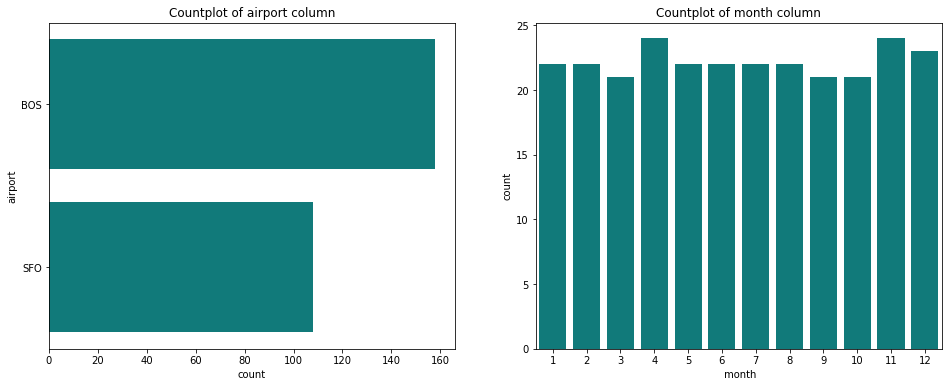

In [10]:
#I have two categorical varibales: carrier_name and year
#Just plot them to see how many rows each variables have
#It is not very meaningful
plt.figure(figsize= (16, 6))
plt.subplot(1,2,1)
sb.countplot(data= df_clean,y= 'airport',color= 'darkcyan')
plt.title('Countplot of airport column');
plt.subplot(1,2,2)
sb.countplot(data= df_clean,x= ' month', color= 'darkcyan')
plt.title('Countplot of month column');

These plots are not very meaningful. They show that how many rows in the table each airport and each month has.

In [11]:
df_clean.head()

,month,carrier,airport,arr_del15,arr_delay,delay_avg
0,1,NK,BOS,70,6608,94.400000
1,1,OO,BOS,46,5702,123.956522
2,1,UA,BOS,225,22281,99.026667
3,1,WN,BOS,137,7890,57.591241
4,1,YV,BOS,2,49,24.500000


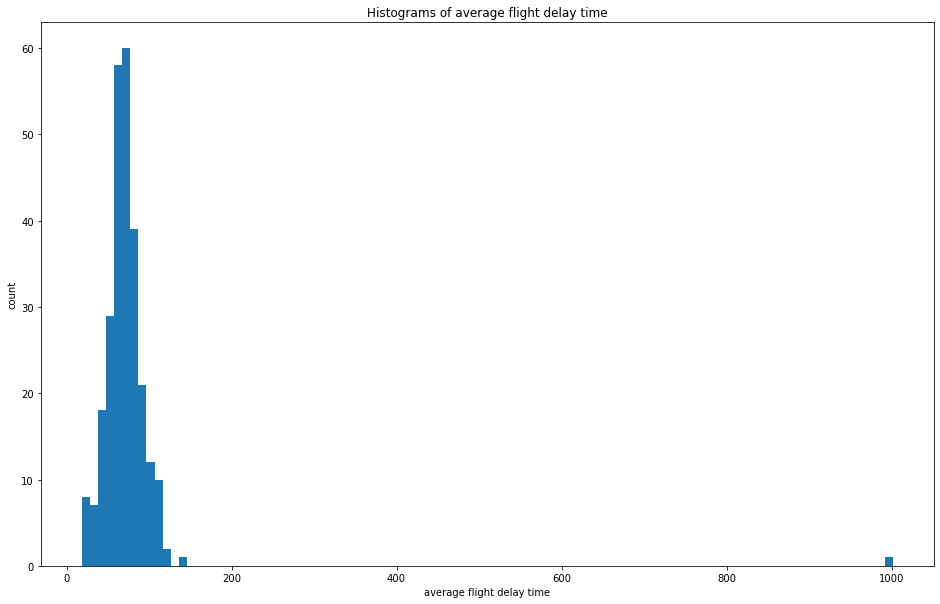

In [12]:
#Plot histograms
plt.figure(figsize= (16,10))
plt.hist(data= df_clean, x= 'delay_avg', bins= 100)
plt.title('Histograms of average flight delay time')
plt.xlabel('average flight delay time')
plt.ylabel('count');

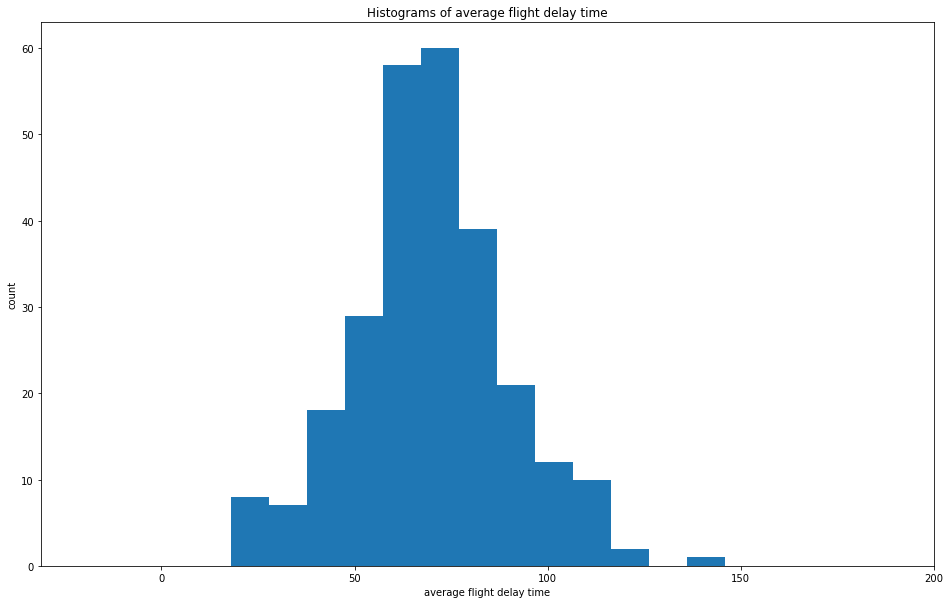

In [13]:
#Plot histograms
plt.figure(figsize= (16,10))
plt.hist(data= df_clean, x= 'delay_avg', bins= 100)
plt.xlim(right=200)
plt.title('Histograms of average flight delay time')
plt.xlabel('average flight delay time')
plt.ylabel('count');

From this plot it is clear to see outliers at around 1000. This value could be dropped, however, I will keep it right now.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From these plots we cannot get some useful informations. We need to plot more variables together to see whether we can find some trends.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the histogram I found some outliers. I keep it right now and in later analysis I might drop them.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

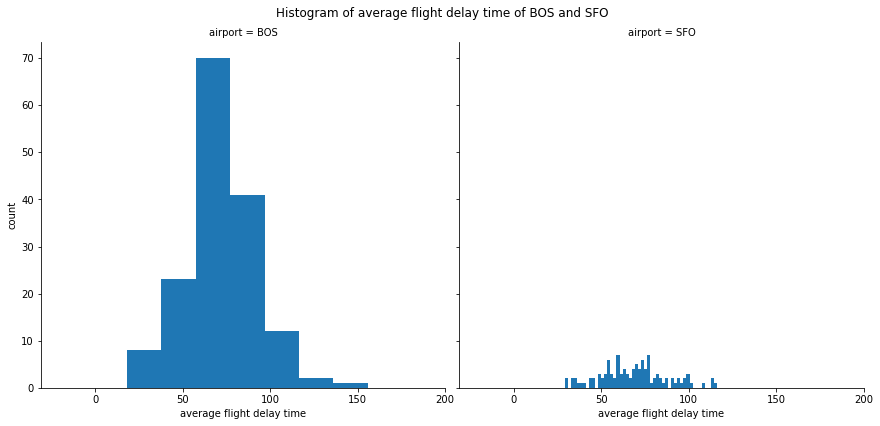

In [15]:
#Plot histogram of each carrier's delay time
g=sb.FacetGrid(data=df_clean, col='airport',size=6)
g.map(plt.hist,'delay_avg',bins=50)
plt.xlim(right=200)
g.axes[0][0].set_xlabel('average flight delay time')
g.axes[0][1].set_xlabel('average flight delay time')
g.axes[0][0].set_ylabel('count')
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Histogram of average flight delay time of BOS and SFO');

From this plot it is obvious to see that the average delay time of SFO is more distributed than BOS.

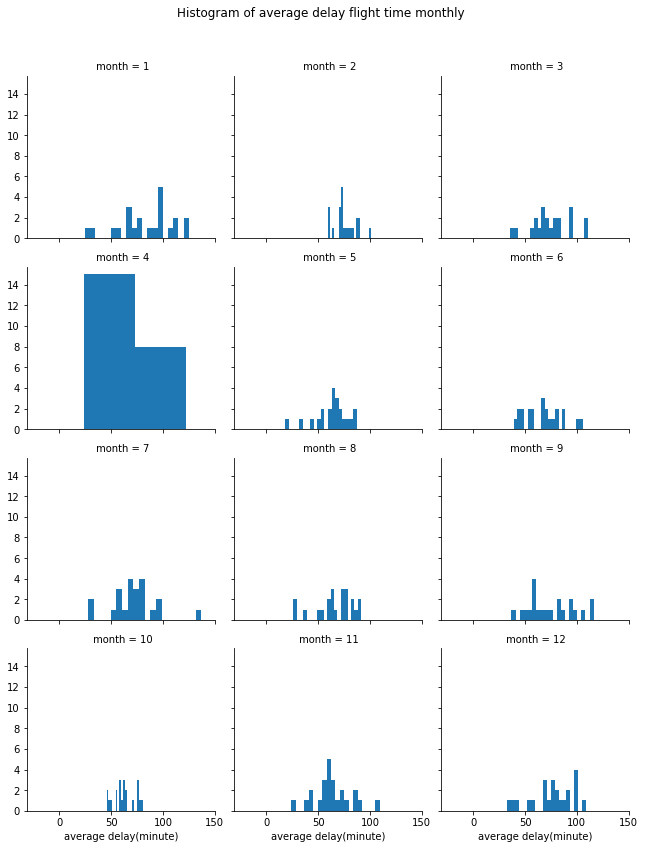

In [16]:
#Plot histogram of each carrier's delay time
g=sb.FacetGrid(data=df_clean, col=' month',col_wrap=3)
g.map(plt.hist,'delay_avg',bins=20)
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Histogram of average delay flight time monthly')
g.axes[9].set_xlabel('average delay(minute)')
g.axes[10].set_xlabel('average delay(minute)')
g.axes[11].set_xlabel('average delay(minute)')
plt.xlim(right=150);

From these histograms of average delay time of each month we could see the average delay time most lie in 50 to 100 minutes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this part I plot two histograms. The first one is average delay time of BOS and SFO. It is clear to see that SFO has a more distributed average delay time. The second one is average delay time of each month in 2019, it is clear to see that the average delay time mostly lie in 50 to 100 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Unfortunately I did not observe some other trends.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

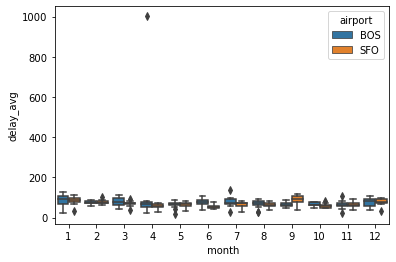

In [17]:
sb.boxplot(data=df_clean,x=' month',y='delay_avg', hue='airport');

We could see clearly the outlier, I am going to drop it and replot the chart.

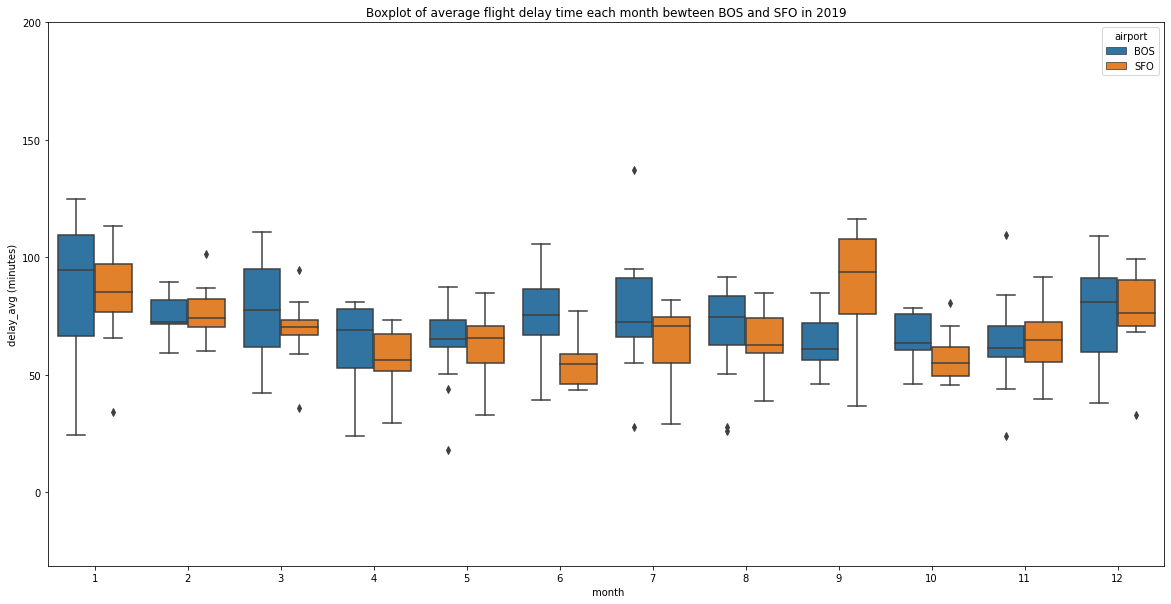

In [18]:
plt.figure(figsize=(20,10))
sb.boxplot(data=df_clean,x=' month',y='delay_avg', hue='airport')
plt.ylim(top=200)
plt.title('Boxplot of average flight delay time each month bewteen BOS and SFO in 2019')
plt.ylabel('delay_avg (minutes)');

From this chart we could see in most month BOS and SFO have similar average flight delay time. In September, the average flight delay time of SFO is obviously higher than the one of BOS. In June, the average flight delay time of SFO is obviously lower than the one of BOS.

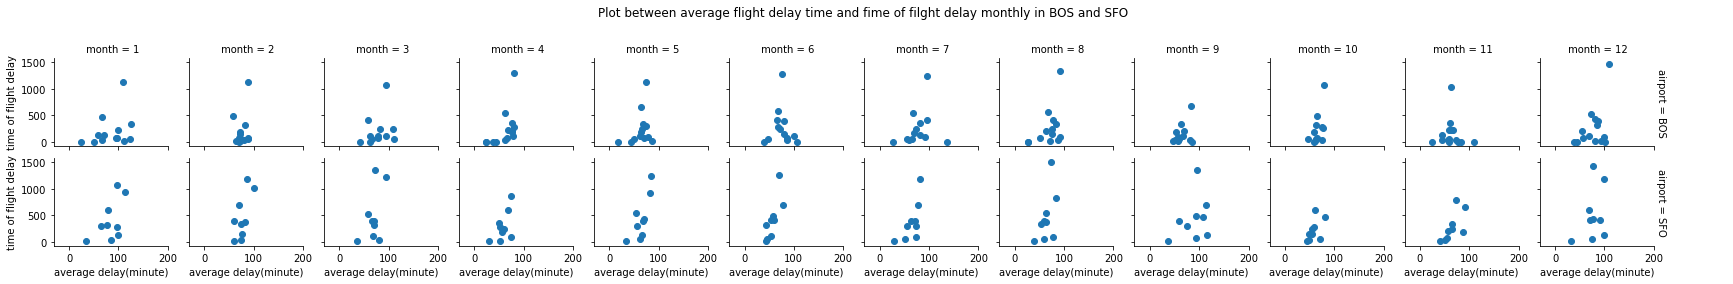

In [19]:
g=sb.FacetGrid(data=df_clean,col=' month',row='airport',height=2, margin_titles=True)
g=g.map(plt.scatter,'delay_avg','arr_del15')
g.fig.subplots_adjust(top=0.8) 
g.fig.suptitle('Plot between average flight delay time and fime of filght delay monthly in BOS and SFO')
for i in range(12):
    g.axes[1][i].set_xlabel('average delay(minute)')
g.axes[0][0].set_ylabel('time of flight delay')
g.axes[1][0].set_ylabel('time of flight delay')
plt.xlim(right=200)
g.add_legend();

From this plot it seems that the higher the times of delay happen, the higher the average flight delay time. This is true in both BOS and SFO.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part firstly I made a boxplot that compares the average flight delay time between BOS and SFO monthly. It shows the average flight delay time of BOS and SFO are similar alghough in June and September there is some major difference. Then I plot the average flight delay time and the time of filght delay monthly, it is clear to see a positive relation.

### Were there any interesting or surprising interactions between features?

> Unfortunately, there is no surprising interactions. The interaction between average delay flight time and time of delay flights are tuitive and the plot also support this positive relation.